In [1]:
!pip install pywaffle -q
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go, express as px
from pywaffle import Waffle
import numpy as np
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_ocorrencias = pd.read_csv('https://raw.githubusercontent.com/igor-diniz/MECD-Statistics/main/data/ocorrencia.csv', sep=';', error_bad_lines=False,  encoding='latin-1')
df_tipo_ocorrencia = pd.read_csv('https://raw.githubusercontent.com/igor-diniz/MECD-Statistics/main/data/ocorrencia_tipo.csv', sep=';', error_bad_lines=False,  encoding='latin-1')
df_aeronave = pd.read_csv('https://raw.githubusercontent.com/igor-diniz/MECD-Statistics/main/data/aeronave.csv', sep=';', error_bad_lines=False,  encoding='latin-1')
df_fator = pd.read_csv('https://raw.githubusercontent.com/igor-diniz/MECD-Statistics/main/data/fator_contribuinte.csv', sep=';', error_bad_lines=False,  encoding='latin-1')


In [3]:
df_ocorrencias.set_index('codigo_ocorrencia', inplace=True)
df_tipo_ocorrencia.set_index('codigo_ocorrencia1', inplace=True)
df_aeronave.set_index('codigo_ocorrencia2', inplace=True)
df_fator.set_index('codigo_ocorrencia3', inplace=True)

In [4]:
df_fator

,fator_nome,fator_aspecto,fator_condicionante,fator_area
codigo_ocorrencia3,,,,
81195,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
81195,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
81195,MANUTENÇÃO DA AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL
81195,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
81195,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
...,...,...,...,...
45331,FRASEOLOGIA DO ÓRGÃO ATS,DESEMPENHO DO SER HUMANO,PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO,FATOR OPERACIONAL
45331,LIDERANÇA,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO
45331,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO


In [5]:
df_ocorrencias.drop(['codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4'], inplace=True, axis=1)

In [6]:
df_ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8778 entries, 82047 to 28256
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ocorrencia_classificacao        8778 non-null   object
 1   ocorrencia_latitude             6200 non-null   object
 2   ocorrencia_longitude            6200 non-null   object
 3   ocorrencia_cidade               8778 non-null   object
 4   ocorrencia_uf                   8778 non-null   object
 5   ocorrencia_pais                 8778 non-null   object
 6   ocorrencia_aerodromo            8778 non-null   object
 7   ocorrencia_dia                  8778 non-null   object
 8   ocorrencia_hora                 8776 non-null   object
 9   investigacao_aeronave_liberada  8475 non-null   object
 10  investigacao_status             7364 non-null   object
 11  divulgacao_relatorio_numero     6913 non-null   object
 12  divulgacao_relatorio_publicado  8778 non-nu

In [7]:
df_fator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4867 entries, 81195 to 45331
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fator_nome           4867 non-null   object
 1   fator_aspecto        4867 non-null   object
 2   fator_condicionante  4867 non-null   object
 3   fator_area           4867 non-null   object
dtypes: object(4)
memory usage: 190.1+ KB


In [8]:
df_aeronave.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8867 entries, 82047 to 28256
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   aeronave_matricula           6228 non-null   object 
 1   aeronave_operador_categoria  6228 non-null   object 
 2   aeronave_tipo_veiculo        6228 non-null   object 
 3   aeronave_fabricante          6228 non-null   object 
 4   aeronave_modelo              6227 non-null   object 
 5   aeronave_tipo_icao           6228 non-null   object 
 6   aeronave_motor_tipo          6195 non-null   object 
 7   aeronave_motor_quantidade    6228 non-null   object 
 8   aeronave_pmd                 6228 non-null   float64
 9   aeronave_pmd_categoria       6228 non-null   float64
 10  aeronave_assentos            5932 non-null   float64
 11  aeronave_ano_fabricacao      5972 non-null   float64
 12  aeronave_pais_fabricante     6228 non-null   object 
 13  aeronave_pais

In [9]:
df_fator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4867 entries, 81195 to 45331
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fator_nome           4867 non-null   object
 1   fator_aspecto        4867 non-null   object
 2   fator_condicionante  4867 non-null   object
 3   fator_area           4867 non-null   object
dtypes: object(4)
memory usage: 190.1+ KB


In [10]:
df_fator["fator_area"].unique()

array(['FATOR OPERACIONAL', 'FATOR HUMANO', 'OUTRO', 'FATOR MATERIAL'],
      dtype=object)

In [11]:
df_aeronave["aeronave_ano_fabricacao"].sort_values().unique()

array([   0., 1936., 1940., 1942., 1945., 1946., 1947., 1948., 1949.,
       1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012.,
       2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.,
       2022., 9999.,   nan])

In [12]:
df = df_ocorrencias.join(df_aeronave).join(df_fator).join(df_tipo_ocorrencia)
df.head()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,...,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
28256,ACIDENTE,-22.2180555556,-47.1763888889,MOGI GUAÇU,SP,BRASIL,***,07/01/2007,11:30:00,***,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT
28335,ACIDENTE,-23.3444444444,-51.0633333333,LONDRINA,PR,BRASIL,***,19/01/2007,12:30:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VOO CONTROLADO CONTRA O TERRENO,VOO CONTROLADO CONTRA O TERRENO,CFIT
28355,ACIDENTE,-17.2541666667,-43.8536111111,BOCAIÚVA,MG,BRASIL,***,18/01/2007,09:10:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALHA ESTRUTURAL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
28375,ACIDENTE,-23.6122222222,-51.385,APUCARANA,PR,BRASIL,***,26/01/2007,18:15:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL
28377,ACIDENTE,***,***,IMPERATRIZ,MA,BRASIL,***,27/01/2007,11:18:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP


In [13]:
df["ocorrencia_dia"] = pd.to_datetime(df["ocorrencia_dia"], format="%d/%m/%Y")

df["idade_aeronave"] = df["ocorrencia_dia"].dt.year - df["aeronave_ano_fabricacao"]
df.tail()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,...,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave
82037,INCIDENTE,-12.90861111111,-38.3225,SALVADOR,BA,BRASIL,SBSV,2023-04-18,11:25:00,SIM,...,NENHUM,0.0,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,10.0
82038,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,BRASIL,SBGR,2023-04-18,09:55:00,SIM,...,NENHUM,0.0,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,10.0
82039,INCIDENTE,-22.81,-43.25055555555,RIO DE JANEIRO,RJ,BRASIL,SBGL,2023-04-17,13:20:00,SIM,...,NENHUM,0.0,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,2023.0
82045,INCIDENTE,-25.53166666666,-49.17611111111,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,SBCT,2023-04-09,20:50:00,SIM,...,NENHUM,0.0,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,2023.0
82047,INCIDENTE,-20.46944444444,-54.67027777777,CAMPO GRANDE,MS,BRASIL,SBCG,2023-04-19,13:25:00,SIM,...,NENHUM,0.0,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,10.0


### Cleaning Data


Variáveis:
- aeronave_ano_fabricacao (Tabela aeronave)
- aeronave_nivel_dano (Tabela aeronave)
- aeronave_fatalidades_total (Tabela aeronave)
- fator_aspecto (Tabela fator_contribuinte)
- ocorrencia_classificacao (Tabela ocorrencias)
- ocorrencia_dia (Tabela ocorrencias)
- ocorrencia_hora (Tabela ocorrencias)

In [14]:
dados = df[["aeronave_ano_fabricacao", "aeronave_nivel_dano", "aeronave_fatalidades_total", "fator_area", "ocorrencia_classificacao", "ocorrencia_dia", "idade_aeronave"]].copy()


In [15]:
dados['ocorrencia_dia'] = pd.to_datetime(df['ocorrencia_dia'], format='%d/%m/%Y')
dados.dropna(inplace=True)

In [16]:
#np.set_printoptions(suppress=True)
np.sort(dados["idade_aeronave"].unique())

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.400e+01, 2.500e+01, 2.600e+01, 2.700e+01, 2.800e+01, 2.900e+01,
       3.000e+01, 3.100e+01, 3.200e+01, 3.300e+01, 3.400e+01, 3.500e+01,
       3.600e+01, 3.700e+01, 3.800e+01, 3.900e+01, 4.000e+01, 4.100e+01,
       4.200e+01, 4.300e+01, 4.400e+01, 4.500e+01, 4.600e+01, 4.700e+01,
       4.800e+01, 4.900e+01, 5.000e+01, 5.100e+01, 5.200e+01, 5.300e+01,
       5.400e+01, 5.500e+01, 5.600e+01, 5.700e+01, 5.800e+01, 5.900e+01,
       6.000e+01, 6.100e+01, 6.200e+01, 6.300e+01, 6.400e+01, 6.500e+01,
       6.600e+01, 6.700e+01, 6.800e+01, 6.900e+01, 7.000e+01, 7.100e+01,
       7.200e+01, 7.300e+01, 7.500e+01, 7.600e+01, 2.012e+03, 2.013e+03,
       2.014e+03, 2.017e+03, 2.018e+03, 2.019e+03, 

In [17]:
dados = dados[dados['aeronave_ano_fabricacao'] > 0]
dados = dados[dados['aeronave_nivel_dano'] != "***"]


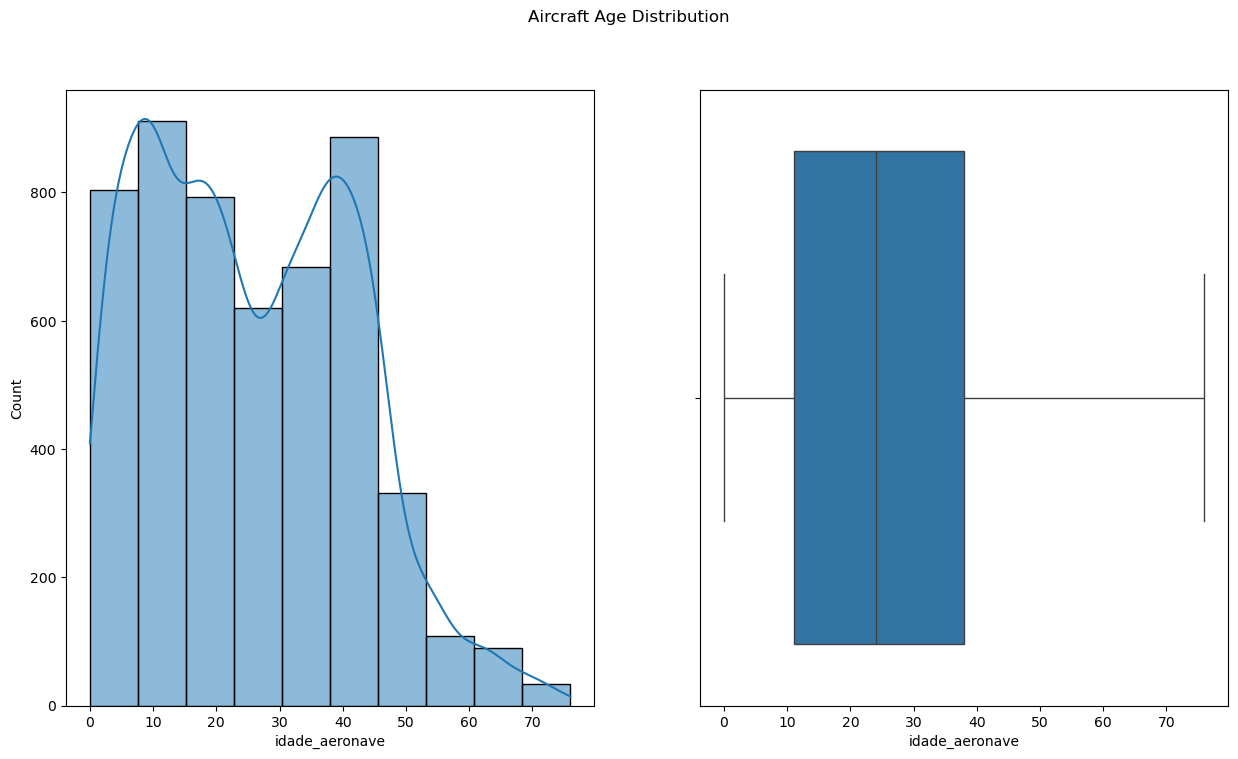

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15, 8))
sns.histplot(data=dados, x="idade_aeronave", kde=True, bins=10, ax=axs[0])
sns.boxplot(data=dados, x="idade_aeronave", ax=axs[1])
fig.suptitle("Aircraft Age Distribution")
plt.show()

In [19]:
q1= dados[dados["idade_aeronave"] < 11]
q2= dados[dados["idade_aeronave"].between(11, 24)]
q3= dados[dados["idade_aeronave"].between(24,38)]
q4= dados[dados["idade_aeronave"] >= 38]
q234 = dados[dados["idade_aeronave"] > 11]

In [20]:
dados.describe()

,aeronave_ano_fabricacao,aeronave_fatalidades_total,idade_aeronave
count,5258.000000,5258.000000,5258.000000
mean,1990.858692,0.629897,25.534994
std,16.222558,1.454515,16.230823
min,1945.000000,0.000000,0.000000
25%,1977.000000,0.000000,11.000000
50%,1992.000000,0.000000,24.000000
75%,2006.000000,0.000000,38.000000
max,2021.000000,10.000000,76.000000


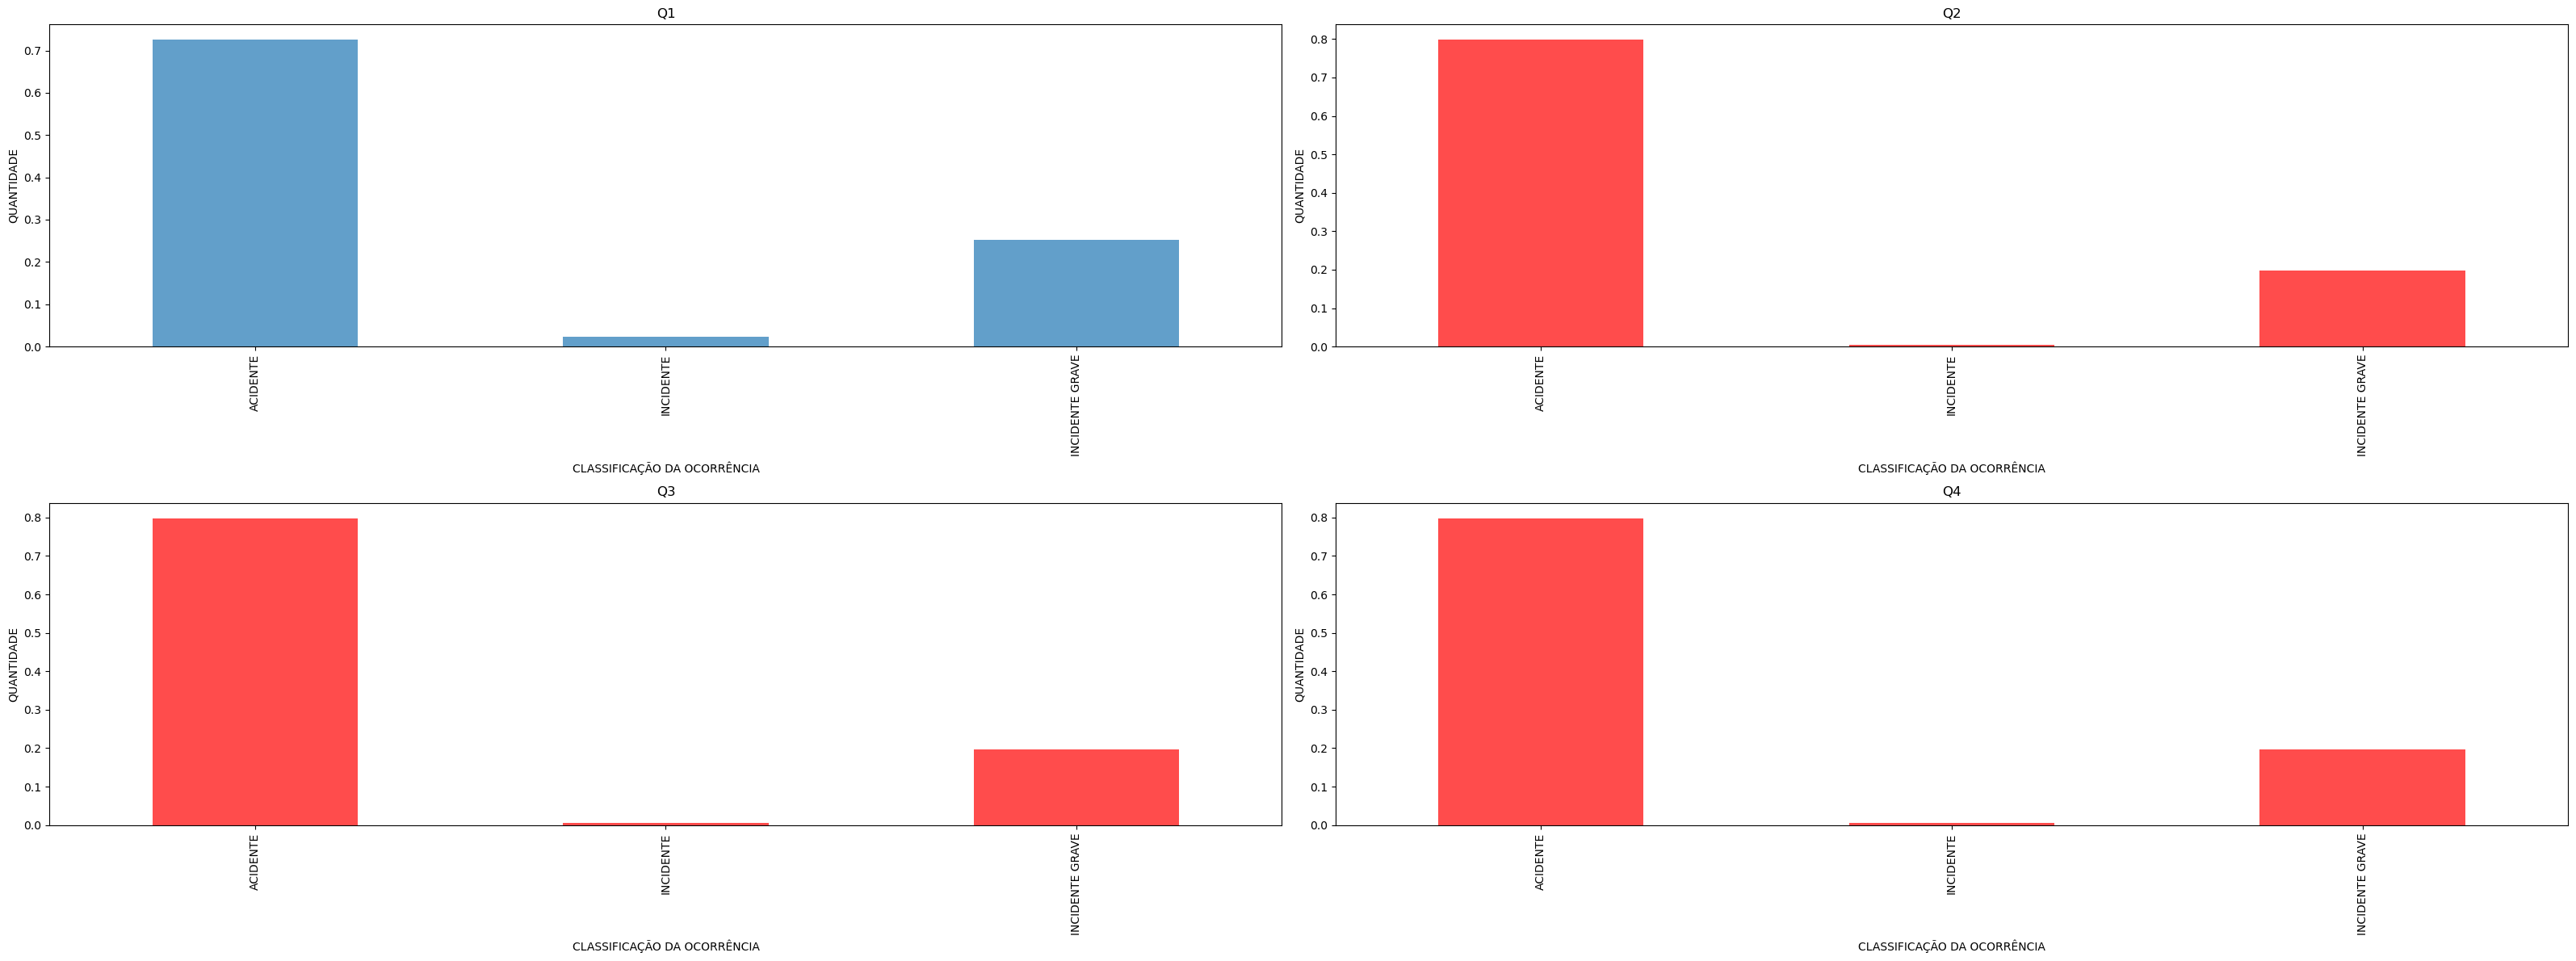

In [21]:
classificacao_q1 = q1.groupby('ocorrencia_classificacao').size()
classificacao_q1 = (classificacao_q1/ classificacao_q1.sum())


classificacao_q2 = q2.groupby('ocorrencia_classificacao').size()
classificacao_q2 = (classificacao_q2/ classificacao_q2.sum())

classificacao_q3 = q2.groupby('ocorrencia_classificacao').size()
classificacao_q3 = (classificacao_q3/ classificacao_q3.sum())

classificacao_q4 = q2.groupby('ocorrencia_classificacao').size()
classificacao_q4 = (classificacao_q4/ classificacao_q4.sum())

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(32, 12))

# Plot the first bar chart (left subplot)
plot_classificacao_q1 = classificacao_q1.plot(kind='bar', ax=axs[0,0], alpha=0.7)
axs[0,0].set_title('Q1')
axs[0,0].set_xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
axs[0,0].set_ylabel('QUANTIDADE')

# Plot the second bar chart (right subplot)
plot_classificacao_q2 = classificacao_q2.plot(kind='bar', ax=axs[0,1], alpha=0.7, color="red")
axs[0,1].set_title('Q2')
axs[0,1].set_xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
axs[0,1].set_ylabel('QUANTIDADE')

# Plot the Third bar chart (left subplot)
plot_classificacao_q3 = classificacao_q3.plot(kind='bar', ax=axs[1,0], alpha=0.7, color="red")
axs[1,0].set_title('Q3')
axs[1,0].set_xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
axs[1,0].set_ylabel('QUANTIDADE')

# Plot the fourth bar chart (right subplot)
plot_classificacao_q4 = classificacao_q4.plot(kind='bar', ax=axs[1,1], alpha=0.7, color="red")
axs[1,1].set_title('Q4')
axs[1,1].set_xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
axs[1,1].set_ylabel('QUANTIDADE')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

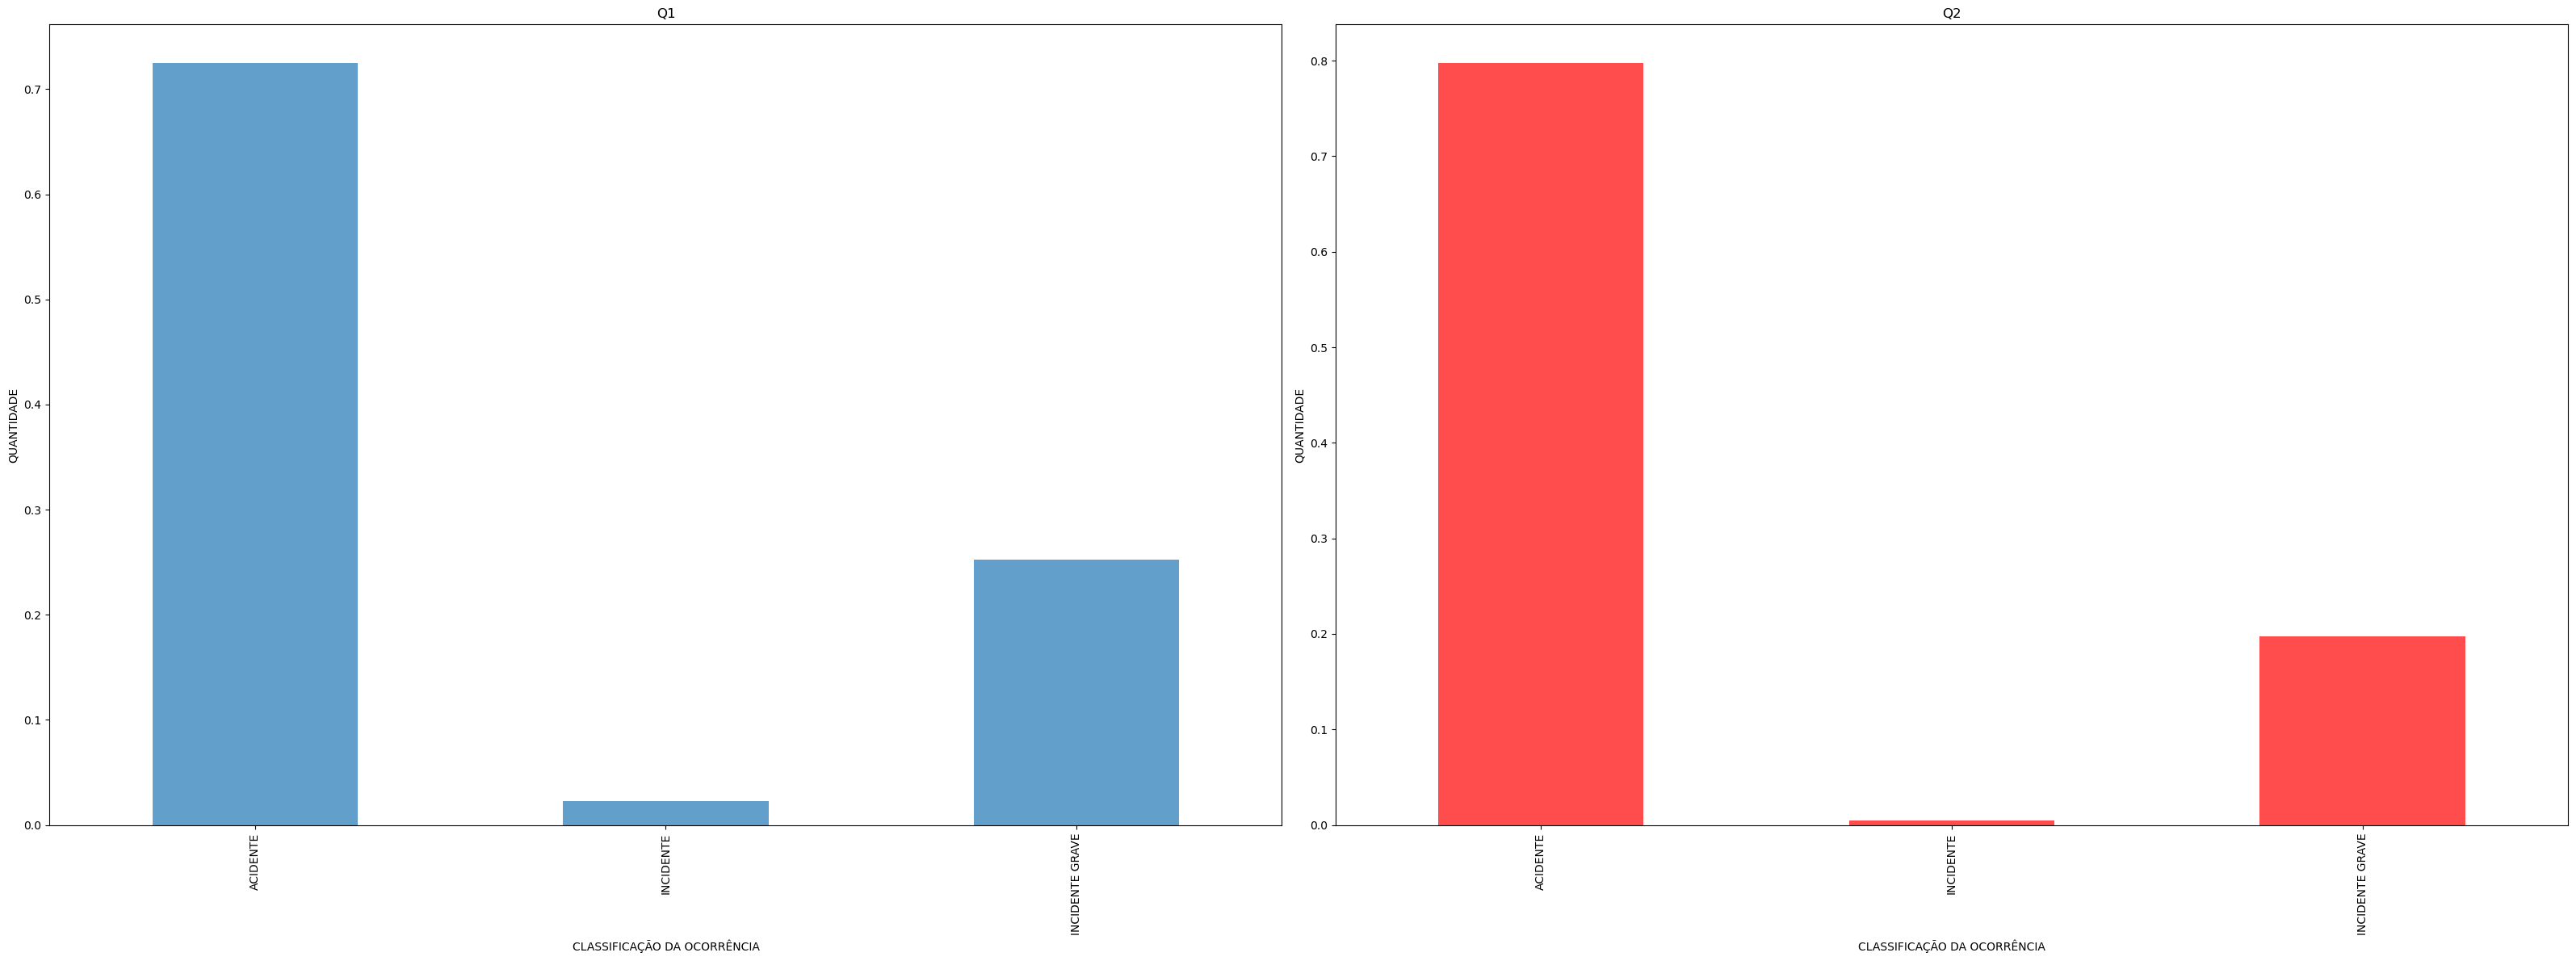

In [22]:
classificacao_q1 = q1.groupby('ocorrencia_classificacao').size()
proportion_q1 = (classificacao_q1/ classificacao_q1.sum())


classificacao_q234 = q2.groupby('ocorrencia_classificacao').size()
proportion_q234 = (classificacao_q234/ classificacao_q234.sum())


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(32, 12))

# Plot the first bar chart (left subplot)
plot_q1 = proportion_q1.plot(kind='bar', ax=axs[0], alpha=0.7)
axs[0].set_title('Q1')
axs[0].set_xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
axs[0].set_ylabel('QUANTIDADE')

# Plot the second bar chart (right subplot)
plot_q234 = proportion_q234.plot(kind='bar', ax=axs[1], alpha=0.7, color="red")
axs[1].set_title('Q2')
axs[1].set_xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
axs[1].set_ylabel('QUANTIDADE')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [23]:
"""if p_value < alpha:
    print(f"Reject the null hypothesis. We can afirm with a {confidence_level}% confidence_level that the proportion of accidents of older aircrafts is higher than newer ones.\
    P value = {p_value}")
else:
    print("Don´t Reject the null hypothesis. There´s no enough evidence to confirm that older aircrafts have a higher proportion of accidents than newer ones.")
"""

'if p_value < alpha:\n    print(f"Reject the null hypothesis. We can afirm with a {confidence_level}% confidence_level that the proportion of accidents of older aircrafts is higher than newer ones.    P value = {p_value}")\nelse:\n    print("Don´t Reject the null hypothesis. There´s no enough evidence to confirm that older aircrafts have a higher proportion of accidents than newer ones.")\n'

### Checking Null Hypothesis
  - H0 = There´s no difference between the proportion of accidents in aircrafts older than 11 years then on aircrafts newer than 11 years
  - H1 = There´s a difference between the proportion of accidents in aircrafts older than 11 years then on aircrafts newer than 11 years

In [24]:
import numpy as np
import scipy.stats as stats

# Given data
newer_sample_size = len(q1)
older_sample_size = len(q1)
older_sample_proportion = proportion_q234["ACIDENTE"]
confidence_level = 0.95

# Calculate the sample proportion
newer_sample_proportion = proportion_q1["ACIDENTE"]

# Calculate the standard error
standard_error = np.sqrt(
    ((older_sample_proportion * (1 - older_sample_proportion)) / older_sample_size) # OLDER SE
    +
    ((newer_sample_proportion * (1 - newer_sample_proportion)) / newer_sample_size) # NEWER SE
)

# Calculate the critical value (Z) for the desired confidence level
alpha = 1 - confidence_level
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calculate the margin of error for the confidence interval
margin_of_error = z_critical * standard_error

# Calculate the confidence interval
proportion_diff = older_sample_proportion - newer_sample_proportion
confidence_interval_lower = proportion_diff - margin_of_error
confidence_interval_upper = proportion_diff + margin_of_error

def to_percentual_points(n):
  return round(n*100, 2)
print(f"We can confirm with a {confidence_level}% confindence level that older aircrafts tend to have\
 {to_percentual_points(confidence_interval_lower)}PP to {to_percentual_points(confidence_interval_upper)}PP more accidents than newer ones")


We can confirm with a 0.95% confindence level that older aircrafts tend to have 3.88PP to 10.67PP more accidents than newer ones


In [25]:
# print(sample_proportion)
# print(claimed_accidents)

# Damage level analysis

## Discritized age distribution

In [26]:
# implementing discretization for the aircraft age
age_max = dados["idade_aeronave"].max()
dados["idade_aeronave"] = dados["idade_aeronave"].astype(int)
dados["aeronave_nivel_dano"].value_counts(normalize=True)

dados["idade_discretizada"] = pd.cut(dados["idade_aeronave"], bins=range(0, int(age_max) + 10, 10), right=False)
print(dados["idade_discretizada"].sort_values().head())
print()
print(dados["idade_discretizada"].sort_values().tail())

66022    [0, 10)
77733    [0, 10)
77733    [0, 10)
77733    [0, 10)
77733    [0, 10)
Name: idade_discretizada, dtype: category
Categories (8, interval[int64, left]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80)]

80547    [70, 80)
79223    [70, 80)
79233    [70, 80)
79323    [70, 80)
80547    [70, 80)
Name: idade_discretizada, dtype: category
Categories (8, interval[int64, left]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80)]


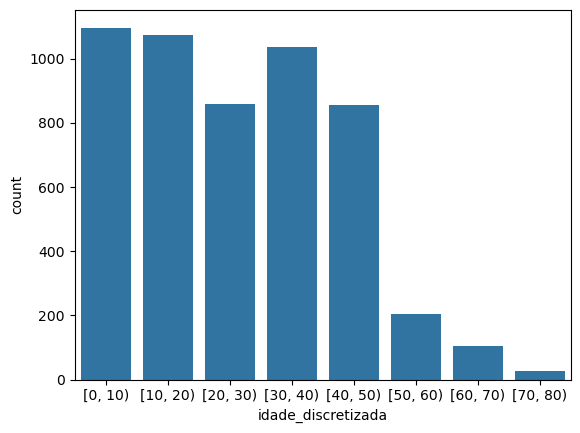

In [27]:
sns.countplot(data=dados, x="idade_discretizada")
plt.show()

Since ages greater than or equal 50 are less frequent, it seems a good oportunity to group all discritized values above 50 and create another catagory [40 , 80) 

In [28]:
dados["idade_discretizada_modificada"] = pd.cut(dados["idade_aeronave"], bins=list(range(0, 41, 10)) + [80], right=False)
dados["idade_discretizada_modificada"].sort_values().tail()


79206    [40, 80)
79206    [40, 80)
79206    [40, 80)
77752    [40, 80)
79437    [40, 80)
Name: idade_discretizada_modificada, dtype: category
Categories (5, interval[int64, left]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) < [40, 80)]

<Axes: xlabel='idade_discretizada_modificada', ylabel='count'>

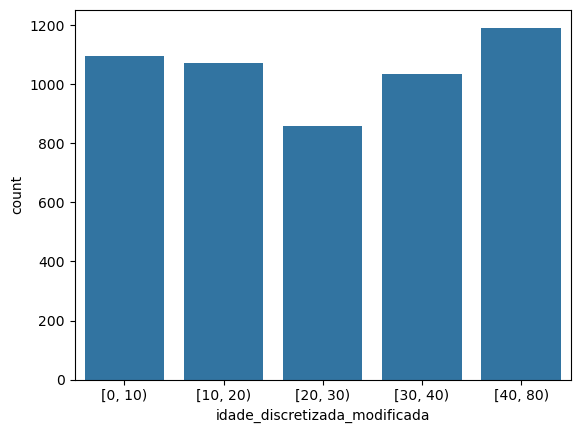

In [29]:
sns.countplot(data=dados, x="idade_discretizada_modificada")

## Damage Levels Proportions

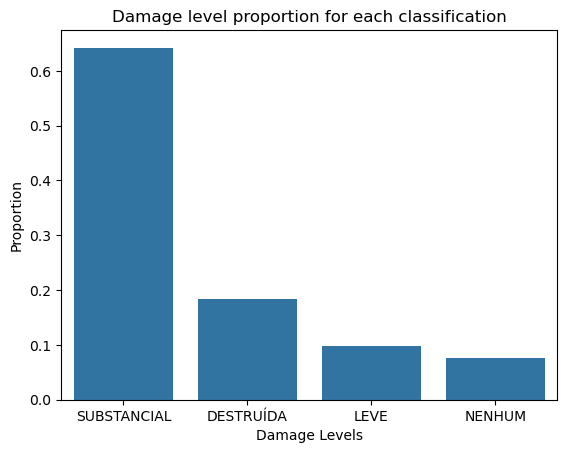

In [30]:
sns.barplot(x=dados["aeronave_nivel_dano"].value_counts(normalize=True).index,
             y=dados["aeronave_nivel_dano"].value_counts(normalize=True)
            )
plt.title("Damage level proportion for each classification")
plt.ylabel("Proportion")
plt.xlabel("Damage Levels")
plt.show()

## Age Distribution Per Damage Level

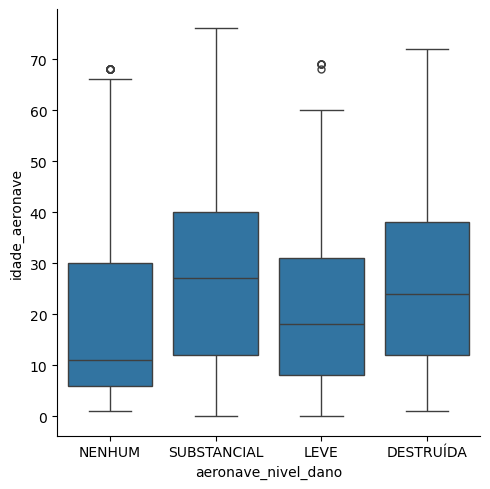

In [31]:
sns.catplot(data=dados, x="aeronave_nivel_dano", y="idade_aeronave", kind="box")
plt.show()

## Proportion of Discritized Ages Per Damage Level

In [32]:
proportions_damage_age = pd.crosstab(dados["idade_discretizada_modificada"], dados["aeronave_nivel_dano"], normalize="index")
proportions_damage_age

aeronave_nivel_dano,DESTRUÍDA,LEVE,NENHUM,SUBSTANCIAL
idade_discretizada_modificada,,,,
"[0, 10)",0.173200,0.125798,0.139471,0.561531
"[10, 20)",0.206897,0.116496,0.088537,0.588071
"[20, 30)",0.152326,0.111628,0.050000,0.686047
"[30, 40)",0.195946,0.090734,0.057915,0.655405
"[40, 80)",0.187919,0.049497,0.040268,0.722315


In [33]:
proportions_damage_age.reset_index(inplace=True)
long_p_damage_age = pd.melt(proportions_damage_age, id_vars=['idade_discretizada_modificada'], value_vars=proportions_damage_age.columns.tolist(), var_name='Nivel', value_name='Proportion')
long_p_damage_age

,idade_discretizada_modificada,Nivel,Proportion
0,"[0, 10)",DESTRUÍDA,0.173200
1,"[10, 20)",DESTRUÍDA,0.206897
2,"[20, 30)",DESTRUÍDA,0.152326
3,"[30, 40)",DESTRUÍDA,0.195946
4,"[40, 80)",DESTRUÍDA,0.187919
5,"[0, 10)",LEVE,0.125798
6,"[10, 20)",LEVE,0.116496
7,"[20, 30)",LEVE,0.111628
8,"[30, 40)",LEVE,0.090734
9,"[40, 80)",LEVE,0.049497


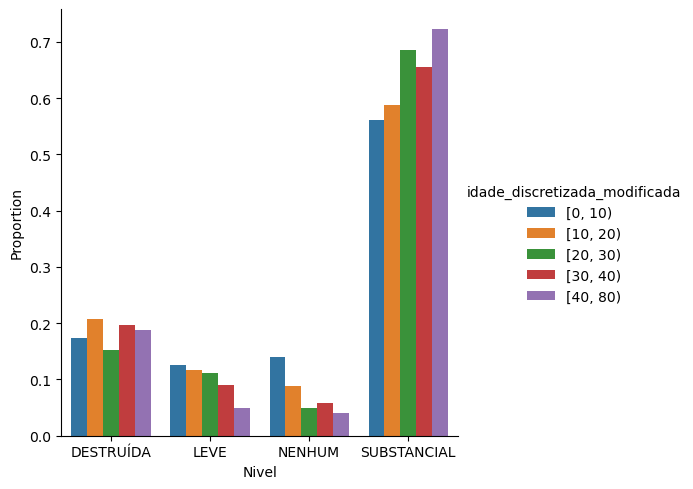

In [34]:
sns.catplot(data=long_p_damage_age, x="Nivel", y="Proportion", hue="idade_discretizada_modificada", kind="bar")
plt.show()

Analysing the charts we can propose two hypothesis:

1. The proportion of airplanes with **less than 10 years which had no damage in the occurences** is significantly greater than proportion of airplanes with **more than 10 years**.
2. The proportion of airplanes with **greater than 20 years which had substancial damage in the occurences** is significantly greater than proportion of airplanes with **more than 20 years**

## Checking Hypothesis 1

The proportion of airplanes with **less than 10 years which had no damage in the occurences** is significantly greater than proportion of airplanes with **more than 10 years**.

In [35]:
# taking broad samples
SAMPLE_SIZE = 150
less10 = dados[dados["idade_discretizada_modificada"] == pd.Interval(0, 10, closed='left')].sample(n=SAMPLE_SIZE, replace=False, axis=0, ignore_index=True)
less10.head()

,aeronave_ano_fabricacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_area,ocorrencia_classificacao,ocorrencia_dia,idade_aeronave,idade_discretizada,idade_discretizada_modificada
0,2013.0,NENHUM,0.0,FATOR HUMANO,INCIDENTE GRAVE,2018-12-02,5,"[0, 10)","[0, 10)"
1,2013.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2017-02-18,4,"[0, 10)","[0, 10)"
2,2011.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2019-02-01,8,"[0, 10)","[0, 10)"
3,2005.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2014-06-13,9,"[0, 10)","[0, 10)"
4,2012.0,DESTRUÍDA,1.0,FATOR HUMANO,ACIDENTE,2013-04-30,1,"[0, 10)","[0, 10)"


In [36]:
more10 = dados[~(dados["idade_discretizada_modificada"] == pd.Interval(0, 10, closed='left'))].sample(n=SAMPLE_SIZE, replace=False, axis=0, ignore_index=True)
more10.head()

,aeronave_ano_fabricacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_area,ocorrencia_classificacao,ocorrencia_dia,idade_aeronave,idade_discretizada,idade_discretizada_modificada
0,1980.0,NENHUM,0.0,FATOR OPERACIONAL,INCIDENTE GRAVE,2014-04-09,34,"[30, 40)","[30, 40)"
1,1985.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2021-08-02,36,"[30, 40)","[30, 40)"
2,1976.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2020-12-09,44,"[40, 50)","[40, 80)"
3,1996.0,LEVE,0.0,FATOR OPERACIONAL,INCIDENTE GRAVE,2016-12-08,20,"[20, 30)","[20, 30)"
4,1974.0,SUBSTANCIAL,2.0,FATOR HUMANO,ACIDENTE,2014-12-06,40,"[40, 50)","[40, 80)"


**Notice:**
- p̂<sub><10</sub> represents the proportion of airplanes with less than 10 years which had no damage in the occurences.
- p̂<sub>>=10</sub> represents the proportion of airplanes with more than or equal 10 years which had no damage in the occurences.

$H_0$: **There IS NO** difference between proportions of airplanes with less than 10 years and more than or equal 10 years which had no damage.
> p̂<sub><10</sub> − p̂<sub>>=10</sub> = 0  

$H_A$: **There IS** difference between proportions of airplanes with less than 10 years and more than or equal 10 years which had no damage.  
> p̂<sub><10</sub> - p̂<sub>>=10</sub> ≠ 0


**Checking conditions for the sampling distribution of p̂1 − p̂2 to be normal**:

1. **Independence**
- Because the data come from a simple random sample, the observations are independent, both within and between samples.

2. **Success-failure condition**
- Since the null hypothesis is that the proportions are equal, we use the pooled proportion ($p̂_{pooled}$) to verify the success-failure condition and estimate the standard error.
- $p̂_{pooled} = \frac{p̂_1 \ * \ n_1 \ + \ p̂_2 \ * \ n_2}{n_1 + n_2}$
- $n_1 \ * \ p̂_{pooled} \ ≥ \ 10 \ and \ n_1 \ * \ (1 - p̂_{pooled}) ≥ 10$
- $n_2 \ * \ p̂_{pooled} \ ≥ \ 10 \ and \ n_2 \ * \ (1 - p̂_{pooled}) ≥ 10$


In [37]:
p_hat_less10 = less10["aeronave_nivel_dano"].value_counts(normalize=True).NENHUM
print("p-hat less than 10 =", p_hat_less10)

p-hat less than 10 = 0.13333333333333333


In [38]:
p_hat_more10 = more10["aeronave_nivel_dano"].value_counts(normalize=True).NENHUM
print("p-hat more than or equal 10 =", p_hat_more10)

p-hat more than or equal 10 = 0.06


In [39]:
p_pooled = (p_hat_less10 * SAMPLE_SIZE + p_hat_more10 * SAMPLE_SIZE) / (SAMPLE_SIZE + SAMPLE_SIZE)
print("p-hat pooled =", p_pooled)

p-hat pooled = 0.09666666666666666


In [40]:
ck1 = p_pooled * SAMPLE_SIZE
ck2 = (1 - p_pooled) * SAMPLE_SIZE

if ck1 >= 10 and ck2 >= 10:
    print("Conditions 𝑛1 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛1 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!")
else:
    print("Conditions 𝑛1 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛1 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 DOES NOT met!")

ck3 = p_pooled * SAMPLE_SIZE
ck4 = (1 - p_pooled) * SAMPLE_SIZE

if ck3 >= 10 and ck4 >= 10:
    print("Conditions 𝑛2 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛2 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!")
else:
    print("Conditions 𝑛2 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛2 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 DOES NOT met!")

Conditions 𝑛1 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛1 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!
Conditions 𝑛2 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛2 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!


**As both conditions are satisfied, we can safely model the difference in proportions using a normal distribution!**

### Calculations

#### Standard error for the difference of proportions
$SE = \sqrt{\frac{p̂_{pooled} \ * \ (1 - p̂_{pooled})}{n_1} + \frac{p̂_{pooled} \ * \ (1 - p̂_{pooled})}{n_2}}$

#### Test statistic
$Z^* = \frac{point \ estimate \ - \ null \ value}{SE}$

#### Significance level we will use
$\alpha = 0.05$

In [41]:
SE = sqrt(p_pooled*(1 - p_pooled) / len(less10) + p_pooled*(1 - p_pooled) / len(more10))
print("SE =", SE)

SE = 0.03412178624129013


In [42]:
point_estimate = p_hat_less10 - p_hat_more10
print("Point estimate =", point_estimate)

Point estimate = 0.07333333333333333


In [43]:
null_value = 0     # it comes from the null hypothesis, since we are considering the difference between proportions 0
print("Null value =", null_value)
print("It comes from the null hypothesis, since we are considering the difference between proportions 0")

Null value = 0
It comes from the null hypothesis, since we are considering the difference between proportions 0


In [44]:
z_score = (point_estimate - null_value) / SE
print("Test statistic (Z*) =", z_score)

Test statistic (Z*) = 2.1491645488533675


In [45]:
# p_value is calculate for one-tail and we are using two-tails
# because of this we must double the value encountered
p_value = stats.norm.sf(abs(z_score)) * 2
alpha = 0.05

if p_value < alpha:
    print(f"For a p-value = {p_value} and alpha = {alpha} we REJECT the null hypothesis!")
else: 
    print(f"For a p-value = {p_value} and alpha = {alpha} we DO NOT REJECT the null hypothesis!")

For a p-value = 0.031621358416154516 and alpha = 0.05 we REJECT the null hypothesis!


### Conclusion

Since we have rejected the null hypothesis, we can conclude that **There IS** difference between proportions of airplanes with less than 10 years and more than or equal 10 years which had no damage.

Furthermore, the point estimate indicate that the direction of that
difference is that airplanes with less than 10 years have proportions of occurences with no damage greater than airplanes with more than or equal 10 years.

## Checking Hypothesis 2

The proportion of airplanes with **greater than 20 years which had substancial damage in the occurences** is significantly greater than proportion of airplanes with **more than 20 years**

In [46]:
# taking broad samples
SAMPLE_SIZE_2 = 100
filter_less_10 = dados["idade_discretizada_modificada"] == pd.Interval(0, 10, closed='left')
filter_btw_10_20 = dados["idade_discretizada_modificada"] == pd.Interval(10, 20, closed='left')

less10_2 = dados[filter_less_10]
btw_10_20 = dados[filter_btw_10_20]

less20 = pd.concat([less10_2, btw_10_20], axis=0)
less20

,aeronave_ano_fabricacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_area,ocorrencia_classificacao,ocorrencia_dia,idade_aeronave,idade_discretizada,idade_discretizada_modificada
45396,2005.0,LEVE,0.0,FATOR OPERACIONAL,INCIDENTE GRAVE,2012-01-11,7,"[0, 10)","[0, 10)"
45396,2005.0,LEVE,0.0,FATOR OPERACIONAL,INCIDENTE GRAVE,2012-01-11,7,"[0, 10)","[0, 10)"
45396,2005.0,LEVE,0.0,FATOR OPERACIONAL,INCIDENTE GRAVE,2012-01-11,7,"[0, 10)","[0, 10)"
45396,2005.0,LEVE,0.0,FATOR OPERACIONAL,INCIDENTE GRAVE,2012-01-11,7,"[0, 10)","[0, 10)"
45564,2007.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2012-02-08,5,"[0, 10)","[0, 10)"
...,...,...,...,...,...,...,...,...,...
81086,2008.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2022-10-29,14,"[10, 20)","[10, 20)"
81086,2008.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2022-10-29,14,"[10, 20)","[10, 20)"
81086,2008.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2022-10-29,14,"[10, 20)","[10, 20)"
81086,2008.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2022-10-29,14,"[10, 20)","[10, 20)"


In [47]:
more20 = dados[~(dados["idade_discretizada_modificada"].isin(less20["idade_discretizada_modificada"]))]
more20.head()

,aeronave_ano_fabricacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_area,ocorrencia_classificacao,ocorrencia_dia,idade_aeronave,idade_discretizada,idade_discretizada_modificada
45390,1989.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2012-01-20,23,"[20, 30)","[20, 30)"
45390,1989.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2012-01-20,23,"[20, 30)","[20, 30)"
45393,1967.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2012-01-22,45,"[40, 50)","[40, 80)"
45393,1967.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2012-01-22,45,"[40, 50)","[40, 80)"
45393,1967.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2012-01-22,45,"[40, 50)","[40, 80)"


**Notice:**
- p̂<sub><20</sub> represents the proportion of airplanes with less than 20 years which had substancial damage in the occurences.
- p̂<sub>>=20</sub> represents the proportion of airplanes with more than or equal 20 years which had substancial damage in the occurences.

$H_0$: **There IS NO** difference between proportions of airplanes with less than 20 years and more than or equal 20 years which had substancial damage.
> p̂<sub><20</sub> − p̂<sub>>=20</sub> = 0  

$H_A$: **There IS** difference between proportions of airplanes with less than 10 years and more than or equal 10 years which had no damage.  
> p̂<sub>>=20</sub> - p̂<sub><20</sub> ≠ 0


**Checking conditions for the sampling distribution of p̂1 − p̂2 to be normal**:

1. **Independence**
- Because the data come from a simple random sample, the observations are independent, both within and between samples.

2. **Success-failure condition**
- Since the null hypothesis is that the proportions are equal, we use the pooled proportion ($p̂_{pooled}$) to verify the success-failure condition and estimate the standard error.
- $p̂_{pooled} = \frac{p̂_1 \ * \ n_1 \ + \ p̂_2 \ * \ n_2}{n_1 + n_2}$
- $n_1 \ * \ p̂_{pooled} \ ≥ \ 10 \ and \ n_1 \ * \ (1 - p̂_{pooled}) ≥ 10$
- $n_2 \ * \ p̂_{pooled} \ ≥ \ 10 \ and \ n_2 \ * \ (1 - p̂_{pooled}) ≥ 10$


In [48]:
p_hat_less20 = less20["aeronave_nivel_dano"].value_counts(normalize=True).SUBSTANCIAL
print("p-hat less than 20 =", p_hat_less20)

p-hat less than 20 = 0.5746543778801844


In [49]:
p_hat_more20 = more20["aeronave_nivel_dano"].value_counts(normalize=True).SUBSTANCIAL
print("p-hat more than or equal 20 =", p_hat_more20)

p-hat more than or equal 20 = 0.6897668393782384


In [50]:
p_pooled_2 = (p_hat_less20 * SAMPLE_SIZE_2 + p_hat_more20 * SAMPLE_SIZE_2) / (SAMPLE_SIZE_2 + SAMPLE_SIZE_2)
print("p-hat pooled =", p_pooled_2)

p-hat pooled = 0.6322106086292113


In [51]:
ck1_2 = p_pooled * SAMPLE_SIZE_2
ck2_2 = (1 - p_pooled) * SAMPLE_SIZE_2

if ck1_2 >= 10 and ck2_2 >= 10:
    print("Conditions 𝑛1 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛1 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!")
else:
    print("Conditions 𝑛1 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛1 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 DOES NOT met!")

ck3_2 = p_pooled * SAMPLE_SIZE_2
ck4_2 = (1 - p_pooled) * SAMPLE_SIZE_2

if ck3_2 >= 10 and ck4_2 >= 10:
    print("Conditions 𝑛2 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛2 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!")
else:
    print("Conditions 𝑛2 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛2 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 DOES NOT met!")

Conditions 𝑛1 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛1 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 DOES NOT met!
Conditions 𝑛2 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛2 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 DOES NOT met!


**As both conditions are satisfied, we can safely model the difference in proportions using a normal distribution!**

### Calculations

#### Standard error for the difference of proportions
$SE = \sqrt{\frac{p̂_{pooled} \ * \ (1 - p̂_{pooled})}{n_1} + \frac{p̂_{pooled} \ * \ (1 - p̂_{pooled})}{n_2}}$

#### Test statistic
$Z^* = \frac{point \ estimate \ - \ null \ value}{SE}$

#### Significance level we will use
$\alpha = 0.05$

In [52]:
SE_2 = sqrt(p_pooled_2*(1 - p_pooled_2) / len(less20) + p_pooled_2*(1 - p_pooled_2) / len(more20))
print("SE =", SE_2)

SE = 0.013507415730727569


In [53]:
point_estimate_2 = p_hat_more20 - p_hat_less20
print("Point estimate =", point_estimate_2)

Point estimate = 0.11511246149805399


In [54]:
null_value_2 = 0     # it comes from the null hypothesis, since we are considering the difference between proportions 0
print("Null value =", null_value_2)
print("It comes from the null hypothesis, since we are considering the difference between proportions 0")

Null value = 0
It comes from the null hypothesis, since we are considering the difference between proportions 0


In [55]:
z_score_2 = (point_estimate_2 - null_value_2) / SE_2
print("Test statistic (Z*) =", z_score_2)

Test statistic (Z*) = 8.522167659072526


In [56]:
# p_value is calculate for one-tail and we are using two-tails
# because of this we must double the value encountered
p_value_2 = stats.norm.sf(abs(z_score_2)) * 2
alpha_2 = 0.05

if p_value_2 < alpha_2:
    print(f"For a p-value = {p_value_2} and alpha = {alpha_2} we REJECT the null hypothesis!")
else: 
    print(f"For a p-value = {p_value_2} and alpha = {alpha_2} we DO NOT REJECT the null hypothesis!")

For a p-value = 1.5659448195649963e-17 and alpha = 0.05 we REJECT the null hypothesis!


### Conclusion

Since we have rejected the null hypothesis, we can conclude that **There IS** difference between proportions of airplanes with less than 20 years and more than or equal 20 years which had substancial damage.

Furthermore, the point estimate indicate that the direction of that
difference is that airplanes with more than or equal 20 years have proportions of occurences with susbtancial damage greater than airplanes with less than 20 years.